# 1. Introduction

In this lesson, we will lean how to aggregate data with Pandas.

We will learn different techniques for aggregating data. and we will build some intuition around the groupby operation.

We will work with the World Happines Report which assigns each country a happiness score based on poll results.

Using that data, we will try to answer the following questions:

1. How can aggregating the data give us more insight into happiness scores?
2. How did world happiness change from 2015 to 2017?
3. Which factors contribute the most to the happiness score?

# 2. Introduction to the Data

In [2]:
import pandas as pd

happiness2015=pd.read_csv("2015.csv")

first_5=happiness2015[:5]

first_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5 non-null      object 
 1   Region                         5 non-null      object 
 2   Happiness Rank                 5 non-null      int64  
 3   Happiness Score                5 non-null      float64
 4   Standard Error                 5 non-null      float64
 5   Economy (GDP per Capita)       5 non-null      float64
 6   Family                         5 non-null      float64
 7   Health (Life Expectancy)       5 non-null      float64
 8   Freedom                        5 non-null      float64
 9   Trust (Government Corruption)  5 non-null      float64
 10  Generosity                     5 non-null      float64
 11  Dystopia Residual              5 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 608.0

# 3. Using Loops to Aggregate Data

<AxesSubplot:title={'center':'Happiness Scores'}>

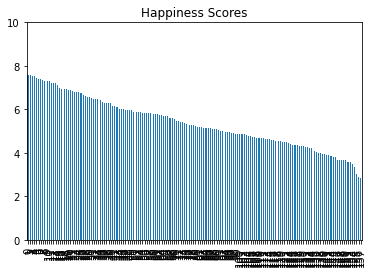

In [3]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

In [4]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

<AxesSubplot:title={'center':'Southern Asia Happiness Scores'}, ylabel='Country'>

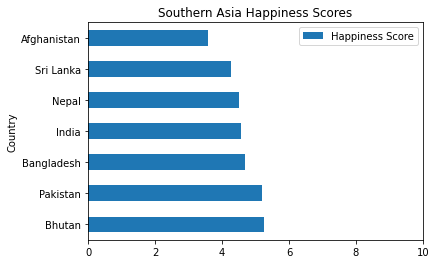

In [5]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [6]:
mean_happiness={}

print(happiness2015["Region"].unique())

for region in happiness2015["Region"].unique():
    region_group=happiness2015[happiness2015["Region"]==region]
    region_mean=region_group["Happiness Score"].mean()
    mean_happiness[region]=region_mean
    
print(mean_happiness)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


So above we split the dataframe into different groups, applied a functino to each group, and then combined the results into a data structure.

# 4. The GroupBy Operation

Pandas has a prebuilt operation for the process that we performed above. The groupby operation performs the split-apply-combine process on a dataframe, however it does it in two steps.

# 5. Creating GroupBy Objects

In [7]:
grouped=happiness2015.groupby("Region")
print(grouped)
aus_nz=grouped.get_group("Australia and New Zealand")
print(aus_nz)

       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  


# 6. Exploring GroupBy Objects

In [8]:
grouped = happiness2015.groupby('Region')

print(grouped.groups)

north_america=happiness2015.iloc[[4,14]]
na_group=grouped.get_group("North America")

equal=north_america==na_group

print(equal)

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'), 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
             72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
            126, 129, 133],
           dtype='int64'), 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'), 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
             47,  50,  52,  56,  57,  64,  97, 104, 118],
           dtype='int64'), 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
            106, 107, 109, 111, 134, 135, 155],
           dtype='int64'), 'North America': Int64Index([4, 14], dtype='int64'), 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'), 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'), 'Sub-Saharan Africa': Int64

# 7. Common Aggregation Methods with Groupby

In [9]:
grouped = happiness2015.groupby('Region')
means=grouped.mean()
print(means)

                                 Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 Standard Error  Economy (GDP per Capita)  \
Region                                                                      
Australia and New Zealand    

# 8. Aggregating Specific Columns with Groupby

In [14]:
grouped = happiness2015.groupby('Region')

happy_grouped=grouped["Happiness Score"]

print(happy_grouped)

happy_mean=happy_grouped.mean()
print(happy_mean)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


# 9. Introduction to the Agg() Method

In [25]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max=happy_grouped.agg([np.mean, np.max])

mean_max_dif=happy_grouped.agg(dif)

print(happy_mean_max)
print(mean_max_dif)

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587
Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western E

# 10. Computing Multiple and Custom Aggregations with the Agg() Method

In [27]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


1. If we run the code above, will the index of happiness_means be the unique values in the Region column or the Happiness Score column?

The index of happiness means will be the unique value in the regions column.

2. Will the values aggregated in happiness_means be the values from the Region column or the Happiness Score column?

The values aggregated in happiness means will be from the happiness score column.

3. Print happiness_means. Were your predictions correct?

Yes they were.

# 11. Aggregation with Pivot Tables

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619
All                                     5.375734
5.3757341772151905


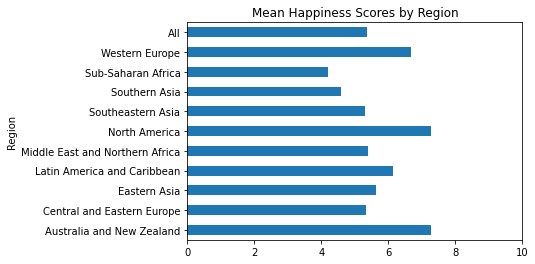

In [32]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

print(pv_happiness)

pv_happiness.plot(kind="barh", xlim=(0,10),title="Mean Happiness Scores by Region", legend=False)

# We can see that Australia and Newzealand are at the top, followed by North America and Western Europe
# close behind. Then other regions of the world are further behind.

world_mean_happiness=happiness2015["Happiness Score"].mean()

print(world_mean_happiness)

It looks like the mean happiness for the world is the same as the mean happiness for the "All" group above.

# 12. Aggregating Multiple Columns and Functions with Pivot Tables

In [39]:
grouped=happiness2015.groupby("Region")[["Happiness Score", "Family"]]
happy_family_stats=grouped.agg([np.min,np.max,np.mean])

pv_happy_family_stats=happiness2015.pivot_table(values=["Happiness Score", "Family"], index="Region", aggfunc=[np.min, np.max, np.mean], margins=True)

print(happy_family_stats)
print(pv_happy_family_stats)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

# 13. Next Steps

In this lesson, we learned how to use the groupby operation and the df.pivot_table() method for aggregation. In the next lesson, we'll learn how to combine datasets using the pd.concat() and pd.merge() functions.